# Stock market forecasting

In [1]:
import yfinance as yf
df = yf.download('SBIN.NS',period='max',interval='1mo')
df.head()

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
1996-01-01,18.691147,19.700714,16.705036,18.549620,12.229542,1587920924
1996-02-01,18.422243,24.460777,18.422243,22.672806,14.947904,1375442845
1996-03-01,22.927555,23.323835,20.474401,22.210480,14.643098,540202683
1996-04-01,21.700979,31.891005,21.700979,28.187685,18.583797,1937276750
1996-05-01,28.871737,29.390675,23.776726,26.182703,17.261934,3235907306


In [2]:
df.shape

(331, 6)

In [3]:
import plotly.graph_objects as go

fig = go.Figure(data=[go.Candlestick(x=list(df.index),
                open=df['Open'],
                high=df['High'],
                low=df['Low'],
                close=df['Close'])])

fig.show()

## Close data price

In [4]:
from statsmodels.tsa.seasonal import seasonal_decompose
T = seasonal_decompose(df['Adj Close'],model='multiplicative')

<Axes: xlabel='Date'>

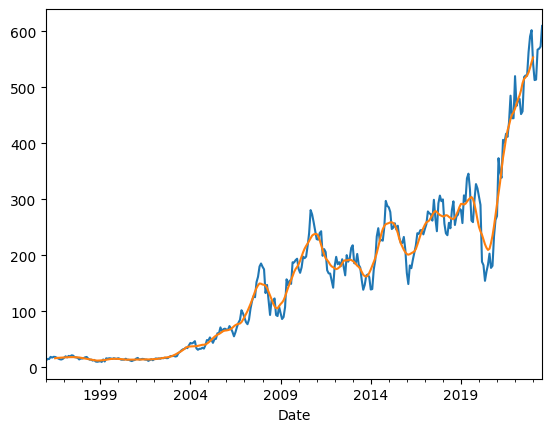

In [5]:
T.observed.plot()
T.trend.plot()

<Axes: xlabel='Date'>

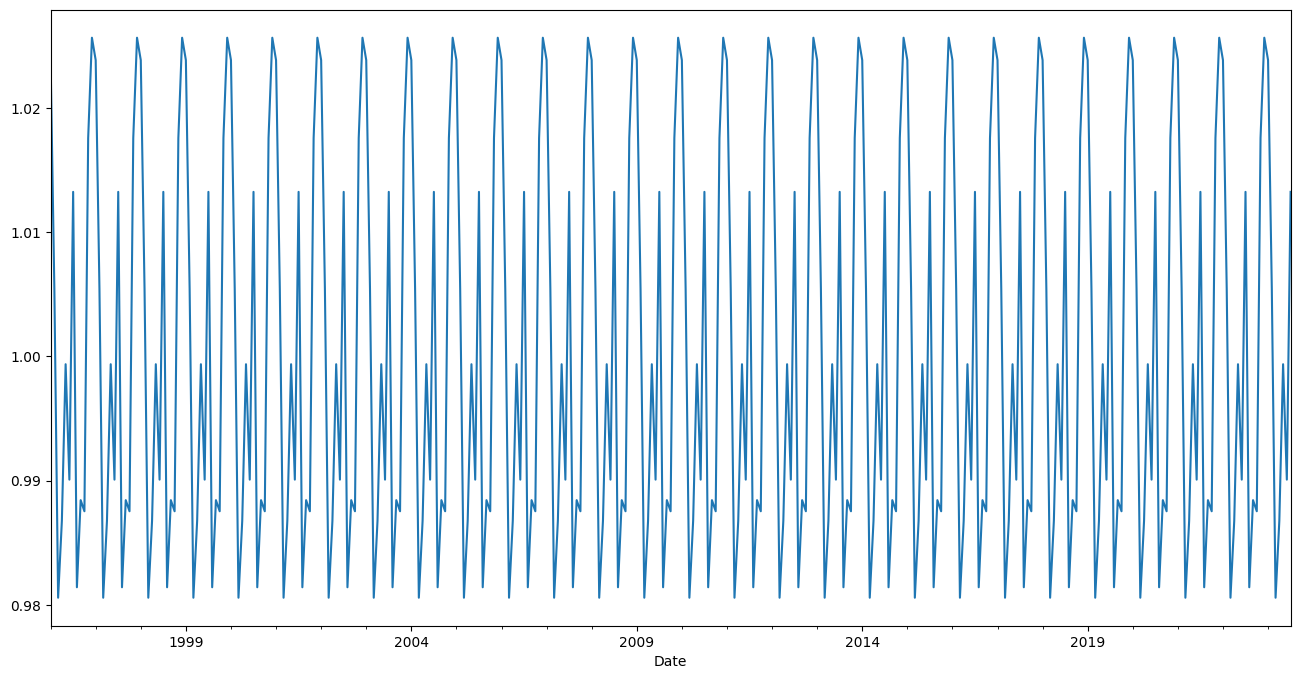

In [6]:
T.seasonal.plot(figsize=(16,8))

<Axes: xlabel='Date'>

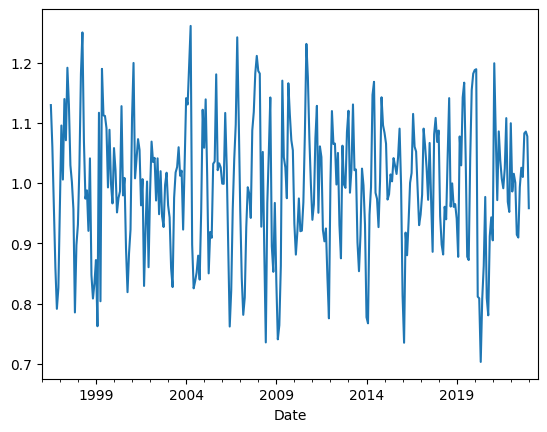

In [7]:
T.resid.plot()

## Time series forecast

In [8]:
from pmdarima.arima import auto_arima

In [9]:
model = auto_arima(df['Adj Close'],seasonal=True,m=12,suppress_warnings=True)

In [10]:
model.order

(2, 1, 1)

In [11]:
p = model.order[0]
d = model.order[1]
q = model.order[2]
print(f'Optimal p, d, q values are p={p}, d={d}, q={q} ')

Optimal p, d, q values are p=2, d=1, q=1 


In [12]:
forecast, conf_int = model.predict(n_periods=36, return_conf_int=True)

In [13]:
forecast

2023-08-01    606.710205
2023-09-01    608.785436
2023-10-01    613.691210
2023-11-01    607.328570
2023-12-01    608.460551
2024-01-01    623.946700
2024-02-01    623.008744
2024-03-01    625.770863
2024-04-01    622.608432
2024-05-01    621.326372
2024-06-01    623.241949
2024-07-01    628.006761
2024-08-01    630.381844
2024-09-01    631.897848
2024-10-01    637.751428
2024-11-01    643.176083
2024-12-01    646.036592
2025-01-01    639.974137
2025-02-01    638.622590
2025-03-01    640.239746
2025-04-01    648.076909
2025-05-01    650.152786
2025-06-01    652.187592
2025-07-01    657.451358
2025-08-01    658.696392
2025-09-01    660.558093
2025-10-01    662.299171
2025-11-01    662.873350
2025-12-01    664.502348
2026-01-01    668.544033
2026-02-01    670.362973
2026-03-01    672.288468
2026-04-01    672.969980
2026-05-01    674.416754
2026-06-01    676.210581
2026-07-01    677.994230
Freq: MS, dtype: float64

In [14]:
conf_int

array([[568.9991546 , 644.42125565],
       [555.26086986, 662.31000279],
       [550.83934999, 676.54306972],
       [534.79246136, 679.86467822],
       [528.04223054, 688.87887086],
       [536.1316975 , 711.76170273],
       [528.43696717, 717.58052034],
       [524.87976337, 726.66196254],
       [515.77262862, 729.44423565],
       [508.86035358, 733.79238946],
       [505.41382689, 741.0700709 ],
       [505.05045524, 750.96306627],
       [503.46677334, 757.29691515],
       [501.15025942, 762.64543689],
       [503.16450704, 772.33834986],
       [504.9296562 , 781.42251012],
       [504.19257207, 787.88061142],
       [494.63335619, 785.31491779],
       [489.86366253, 787.38151682],
       [488.1402955 , 792.33919708],
       [492.70865151, 803.44516701],
       [491.58304697, 808.72252483],
       [490.4797814 , 813.89540199],
       [492.66520454, 822.23751091],
       [490.00039898, 827.39238502],
       [488.03417607, 833.08201027],
       [486.15017184, 838.44817054],
 

In [15]:
import pandas as pd
low_bound = conf_int[:,0]
low_bound = pd.Series(low_bound)
low_bound.index = forecast.index
low_bound.head()

2023-08-01    568.999155
2023-09-01    555.260870
2023-10-01    550.839350
2023-11-01    534.792461
2023-12-01    528.042231
Freq: MS, dtype: float64

In [16]:
upper_bound = conf_int[:,1]
upper_bound = pd.Series(upper_bound)
upper_bound.index=forecast.index
upper_bound.head()

2023-08-01    644.421256
2023-09-01    662.310003
2023-10-01    676.543070
2023-11-01    679.864678
2023-12-01    688.878871
Freq: MS, dtype: float64

In [17]:
df_forecast = forecast.to_frame()

In [18]:
df_forecast.columns= ['Forecast']

In [19]:
df_forecast

,Forecast
2023-08-01,606.710205
2023-09-01,608.785436
2023-10-01,613.691210
2023-11-01,607.328570
2023-12-01,608.460551
2024-01-01,623.946700
2024-02-01,623.008744
2024-03-01,625.770863
2024-04-01,622.608432
2024-05-01,621.326372


In [20]:
df_forecast['Lower']=low_bound
df_forecast['Upper']=upper_bound

In [21]:
df_forecast

,Forecast,Lower,Upper
2023-08-01,606.710205,568.999155,644.421256
2023-09-01,608.785436,555.260870,662.310003
2023-10-01,613.691210,550.839350,676.543070
2023-11-01,607.328570,534.792461,679.864678
2023-12-01,608.460551,528.042231,688.878871
2024-01-01,623.946700,536.131697,711.761703
2024-02-01,623.008744,528.436967,717.580520
2024-03-01,625.770863,524.879763,726.661963
2024-04-01,622.608432,515.772629,729.444236
2024-05-01,621.326372,508.860354,733.792389


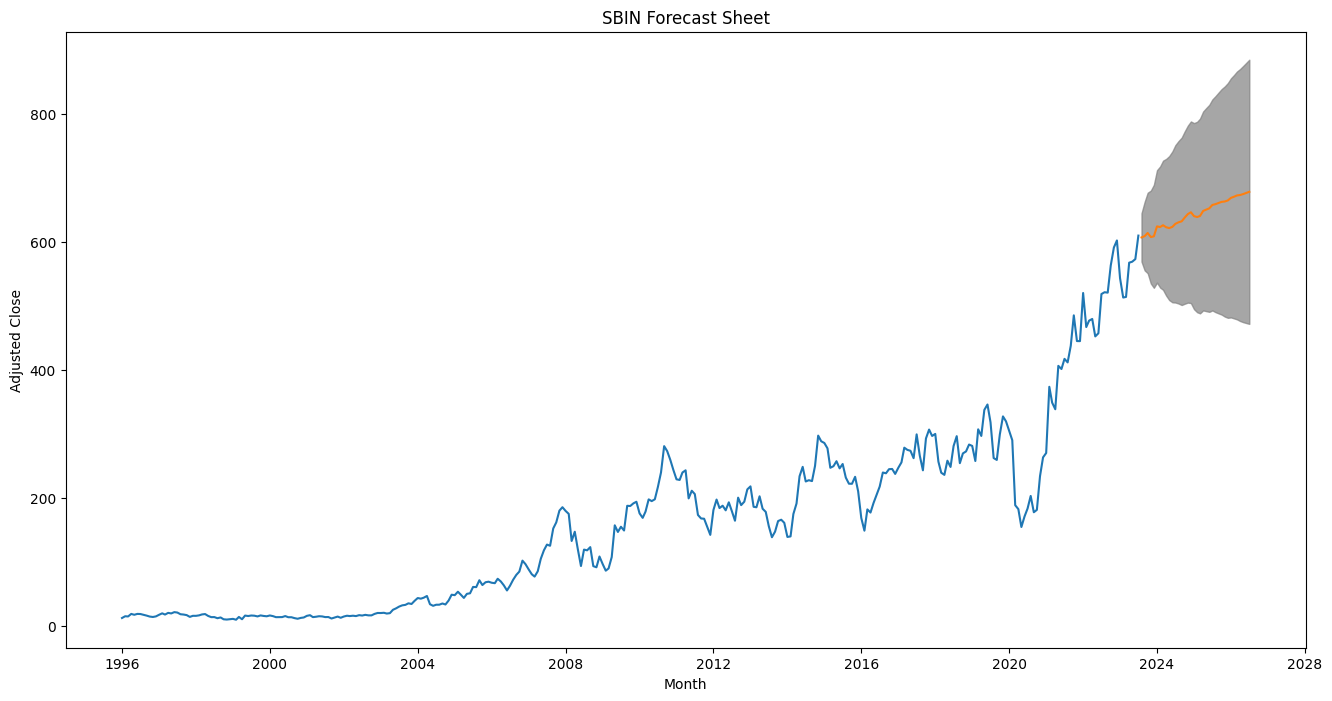

In [22]:
import matplotlib.pyplot as plt
plt.figure(figsize=(16,8))
plt.plot(df['Adj Close'],label='Actual')
plt.plot(forecast,label='Forecast')
plt.fill_between(forecast.index,low_bound,upper_bound,alpha=0.7,color='gray',label='Confidence Intetrval')
plt.xlabel('Month')
plt.ylabel('Adjusted Close')
plt.title('SBIN Forecast Sheet')
plt.show()